Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking, CmdStan, StanMCMCChain
gr(size=(500,500));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

### snippet 4.7

In [3]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);

Use only adults

In [4]:
df2 = filter(row -> row[:age] >= 18, df)
female_df = filter(row -> row[:male] == 0, df2)
male_df = filter(row -> row[:male] == 1, df2)
first(male_df, 5)

,height,weight,age,male
,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,151.765,47.8256,63.0,1
2,156.845,53.0419,41.0,1
3,163.83,62.9926,35.0,1
4,168.91,55.48,27.0,1
5,165.1,54.4877,54.0,1


Plot the densities.

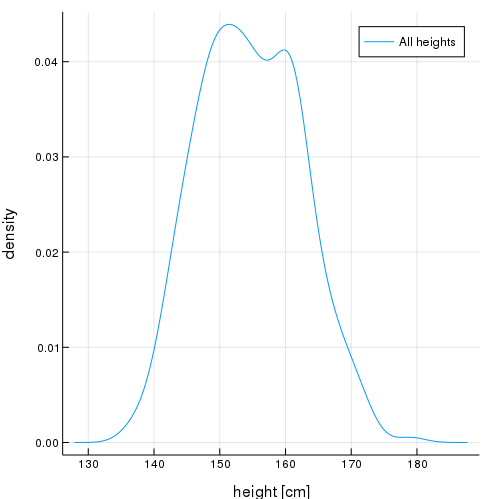

In [5]:
density(df2[:height], lab="All heights", xlab="height [cm]", ylab="density")

Is it bi-modal?

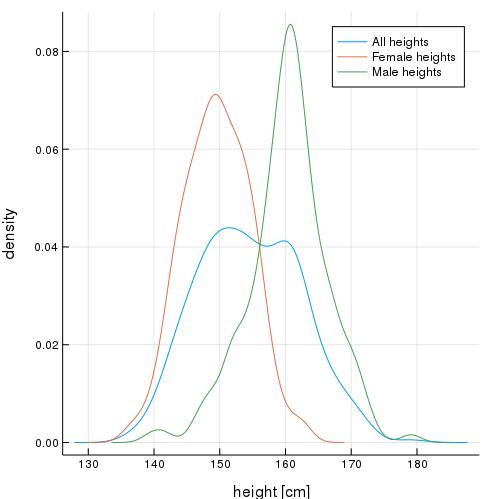

In [6]:
density!(female_df[:height], lab="Female heights")
density!(male_df[:height], lab="Male heights")

Define the Stan language model

In [7]:
heightsmodel = "
// Inferring a Rate
data {
  int N;
  real<lower=0> h[N];
}
parameters {
  real<lower=0> sigma;
  real<lower=0,upper=250> mu;
}
model {
  // Priors for mu and sigma
  mu ~ normal(178, 20);
  sigma ~ uniform( 0 , 50 );

  // Observed heights
  h ~ normal(mu, sigma);
}
";

Define the Stanmodel and set the output format to :mcmcchain.

In [8]:
stanmodel = Stanmodel(name="heights", monitors = ["mu", "sigma"],model=heightsmodel,
  output_format=:mcmcchain);
# Input data for cmdstan
heightsdata = Dict("N" => length(df2[:height]), "h" => df2[:height]);


File /Users/rob/.julia/dev/StatisticalRethinking/scripts/04/tmp/heights.stan will be updated.



Sample using cmdstan

In [9]:
rc, chn, cnames = stan(stanmodel, heightsdata, ProjDir, diagnostics=false,
  CmdStanDir=CMDSTAN_HOME);
# Describe the draws
describe(chn)


Inference for Stan model: heights_model
4 chains: each with iter=(1000,1000,1000,1000); warmup=(0,0,0,0); thin=(1,1,1,1); 4000 iterations saved.

Warmup took (0.033, 0.032, 0.034, 0.034) seconds, 0.13 seconds total
Sampling took (0.059, 0.061, 0.055, 0.066) seconds, 0.24 seconds total

                Mean     MCSE  StdDev    5%   50%   95%    N_Eff  N_Eff/s    R_hat
lp__            -892  2.4e-02     1.0  -894  -891  -891  1.8e+03  7.7e+03  1.0e+00
accept_stat__   0.92  1.4e-03   0.097  0.72  0.96   1.0  4.7e+03  1.9e+04  1.0e+00
stepsize__      0.81  1.1e-02   0.016  0.79  0.81  0.83  2.0e+00  8.3e+00  1.3e+13
treedepth__      2.0  1.5e-02    0.73   1.0   2.0   4.0  2.3e+03  9.5e+03  1.0e+00
n_leapfrog__     5.3  1.3e-01     5.8   1.0   3.0    19  2.0e+03  8.1e+03  1.0e+00
divergent__     0.00      nan    0.00  0.00  0.00  0.00      nan      nan      nan
energy__         893  3.5e-02     1.4   891   892   895  1.7e+03  7.0e+03  1.0e+00
sigma            7.8  5.6e-03    0.29   7.3   7.

Plot the density of posterior draws

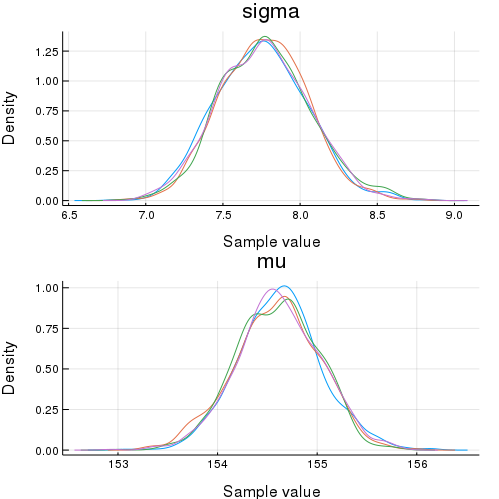

In [10]:
density(chn, lab="All heights", xlab="height [cm]", ylab="density")

End of `clip_07.0s.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*